# Introduction to Loan Approval Prediction

The Loan Approval Prediction project offers a sophisticated machine learning solution designed to empower investors in making well-informed decisions regarding loan approvals. Leveraging a **Random Forest Classifier**, the model integrates various features related to loan applicants, providing a comprehensive analysis of creditworthiness. This project not only facilitates the prediction of loan approval outcomes but also enhances transparency through a newly added **feature importance visualization**. By visualizing the significance of each feature in the decision-making process, investors can gain deeper insights into the factors influencing credit decisions. With a structured codebase and clear documentation, the Loan Approval Prediction project serves as a valuable tool for navigating the complexities of predictive modeling in the financial domain.

## Import Libraries

The code begins by importing necessary Python libraries for data analysis, visualization, and performance evaluation. The libraries included are:

1. **Pandas** - Pandas is a powerful data manipulation and analysis library in Python. It is used for loading and manipulating datasets. It provides data structures like DataFrame, making it easy to explore and preprocess tabular data.

2. **Matplotlib** - Matplotlib is a widely used plotting library in Python. It is used for creating various types of plots and visualizations, such as line plots, scatter plots, histograms, and more.

3. **Seaborn** - Seaborn is a statistical data visualization library built on top of Matplotlib. It enhances the aesthetic appeal of Matplotlib plots and provides additional functions for statistical visualizations.

4. **Sci-kit Learn** - Scikit-learn is considered as the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Data Loading, Exploration, and Handling

The **pd.read_csv** function from the Pandas library is used to read the **'loan_data.csv'** file and create a DataFrame **df**, which holds the tabular data. This step is crucial for accessing and manipulating the dataset, enabling further analysis and modeling.

The **info()** method provides an overview of the dataset, including the data types of each column, non-null counts, and memory usage. This information is essential for understanding the structure of the dataset and identifying potential issues such as missing values. The **isnull().sum()** method is used to count and display the number of missing values in each column.  Identifying missing values is crucial for determining data quality and deciding on appropriate handling strategies.

The features **X** and the target variable **y** are defined for subsequent machine learning model training. The features encompass all columns except the 'credit.policy' column, which is designated as the target variable.

In [2]:
#Load dataset
df = pd.read_csv('loan_data.csv')

In [3]:
#Data exploration and handling
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [4]:
#Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [5]:
# Define features and target variable
X = df.drop('credit.policy', axis=1)
y = df['credit.policy']

## Model Training 

The **train_test_split** function from scikit-learn is employed to partition the dataset into training and testing sets. This ensures the model's performance is evaluated on unseen data. The training set **(X_train, y_train)** is used to train the model, while the testing set (X_test, y_test) evaluates its generalization performance.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
categorical_features = ['purpose']
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

## Define Preprocessing Steps

 A preprocessing pipeline is defined to handle numerical and categorical features separately. Numerical features are passed through unchanged, while categorical features are one-hot encoded. **The ColumnTransformer** facilitates the application of specific transformations to different types of features.
 
The pipeline is constructed, combining the defined preprocessing steps and a Random Forest Classifier. This pipeline streamlines the workflow and ensures consistency. The pipeline automates the execution of preprocessing and model training steps.

In [7]:
# Create a pipeline with preprocessing and the random forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

## Hyperparameter Tuning

A grid of hyperparameters for the Random Forest Classifier is defined. GridSearchCV will search through these combinations to find the optimal configuration. The grid serves as a guide for **exploring different hyperparameter values** during the model tuning process. GridSearchCV systematically searches through the hyperparameter grid, performing cross-validation to find the combination that maximizes the specified scoring metric. 

The final model, with optimized hyperparameters, is obtained from the results of the grid search and is ready for evaluation.

In [9]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['purpose'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_dept

## Model Evaluation

The best-performing model is extracted from the results of the hyperparameter tuning performed using GridSearchCV. The **best_model** variable now holds the optimal configuration of the model for making predictions.

The accuracy of the model's predictions on the test set is computed and the accuracy score provides a straightforward measure of the model's overall performance.

The code then generates a detailed classification report, including **precision**, **recall**, and **F1-score** for each class. The classification report provides a more nuanced understanding of the model's performance across different classes.

In [10]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display the best hyperparameters from GridSearchCV
print("Best Hyperparameters:\n", grid_search.best_params_)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       372
           1       0.99      0.99      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.98      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916

Best Hyperparameters:
 {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


## Feature Importance Visualization

The code will retrieve the feature importance scores from the best-performing Random Forest Classifier within the pipeline. These scores represent the contribution of each feature to the model's predictive capability. Then, it constructs a list of feature names by combining numeric features and one-hot encoded categorical feature names. This list is crucial for creating a clear and labeled visualization.

Afterwards, a **bar plot** is generated for illustrating the importance of each feature. The plot provides a visual representation of feature importance, aiding in the interpretation of the model's behavior.

In [12]:
# Visualize feature importance
feature_importance = best_model.named_steps['classifier'].feature_importances_
feature_names = numeric_features.tolist() + best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

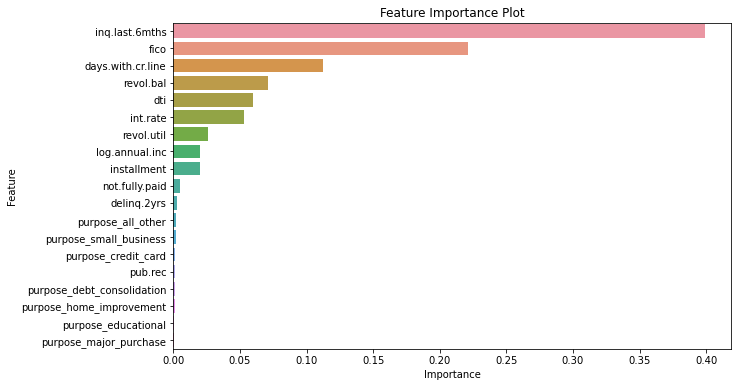

In [13]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Test case

This section defines a specific scenario with input features for testing the model. This test case is representative of a situation for which the credit policy is to be predicted.

In [14]:
#Create a test case which supposed to be 1 for credit policy
test_case = {
    'purpose': 'debt_consolidation',
    'int.rate': 0.1461,
    'installment': 448.18,
    'log.annual.inc': 10.58658,
    'dti': 21.39,
    'fico': 677,
    'days.with.cr.line': 2430,
    'revol.bal': 14021,
    'revol.util': 71.9,
    'inq.last.6mths': 0,
    'delinq.2yrs': 0,
    'pub.rec': 0,
    'not.fully.paid': 0 
}

# Convert the test case to a DataFrame
test_df = pd.DataFrame([test_case])

# Use the best_model to make predictions
predicted_credit_policy = best_model.predict(test_df)[0]

# Display the predicted credit policy
print(f"Predicted Credit Policy: {predicted_credit_policy}")

Predicted Credit Policy: 1
